In [1]:
import pandas as pd
import numpy as np

In [55]:
import seaborn as sns

In [2]:
import re

In [3]:
df=pd.read_csv(r'..\data\Cabin_cleaned.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName,Deck,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,NaN,Unknown,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley,Florence Briggs Thayer,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,NaN,Unknown,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath,Lily May Peel,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,NaN,Unknown,0


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             34
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          676
Embarked         2
LastName         0
Title            0
HusbandName     16
ActualName     748
Deck             0
HasCabin         0
dtype: int64

In [6]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName,Deck,HasCabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,Miss,Amelie,NaN,B,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,Mrs,George Nelson,Martha Evelyn,B,1


### Embarked Column - Missing Values

- There are 2 passengers with missing values in the `Embarked` column.
- Given the very small number and no strong evidence for accurate imputation, these values were left as `NaN`.
- This choice is unlikely to affect model performance or analysis due to the small proportion.


In [7]:
df.loc[df['Fare']==0].sort_values('Pclass')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName,Deck,HasCabin
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Harrison,Mr,William,NaN,B,1
815,816,0,1,"Fry, Mr. Richard",male,46.0,0,0,112058,0.0,B102,S,Fry,Mr,Richard,NaN,B,1
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,Reuchlin,Jonkheer,John George,NaN,Unknown,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,46.0,0,0,112052,0.0,NaN,S,Parr,Mr,William Henry Marsh,NaN,Unknown,0
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,Andrews,Mr,Thomas Jr,NaN,A,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,NaN,S,Parkes,Mr,"Francis ""Frank""",NaN,Unknown,0
466,467,0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0,NaN,S,Campbell,Mr,William,NaN,Unknown,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.0,NaN,S,Cunningham,Mr,Alfred Fleming,NaN,Unknown,0
674,675,0,2,"Watson, Mr. Ennis Hastings",male,30.0,0,0,239856,0.0,NaN,S,Watson,Mr,Ennis Hastings,NaN,Unknown,0
732,733,0,2,"Knight, Mr. Robert J",male,30.0,0,0,239855,0.0,NaN,S,Knight,Mr,Robert J,NaN,Unknown,0


In [8]:
df.loc[df['Ticket'].str.contains('1120')].sort_values('Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,HusbandName,ActualName,Deck,HasCabin
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.00,A36,S,Andrews,Mr,Thomas Jr,NaN,A,1
633,634,0,1,"Parr, Mr. William Henry Marsh",male,46.0,0,0,112052,0.00,NaN,S,Parr,Mr,William Henry Marsh,NaN,Unknown,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Graham,Miss,Margaret Edith,NaN,B,1
815,816,0,1,"Fry, Mr. Richard",male,46.0,0,0,112058,0.00,B102,S,Fry,Mr,Richard,NaN,B,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.00,B94,S,Harrison,Mr,William,NaN,B,1
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.05,NaN,S,Meo,Mr,Alfonzo,NaN,Unknown,0





### Fare Column - Zero Fare Values

- Found 15 passengers with `Fare = 0`.
  - 5 from 1st Class
  - 6 from 2nd Class
  - 4 from 3rd Class
- All of them embarked from **'S' (Southampton)**.
- Within each class, these passengers share similar or sequential ticket number patterns — likely indicating group bookings, crew arrangements, or complimentary tickets.
- No fare correction applied; values left as `0` as they appear valid based on supporting ticket/embark/class data.


In [9]:
df['FamilySize']=df['SibSp']+df['Parch']+1
df['IsAlone']=df['FamilySize'].apply(lambda x :1 if x==1 else 0)
df['FarePerPerson']=df['Fare']/df['FamilySize']

In [10]:
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['Children', 'Young Adults', 'Middle Adults' ,'Adults', 'Seniors']


df['AgeBin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [71]:
df['FareQuantile'],fare_bins = pd.qcut(df['Fare'], q=4, labels=['Low', 'Mid', 'High', 'Very High'],retbins=True)


In [72]:
fare_bins

array([  0.    ,   7.9104,  14.4542,  31.    , 512.3292])

In [54]:
print(df['Fare'].value_counts(bins=150,sort=False).to_string())

(-0.513, 3.416]        15
(3.416, 6.831]          9
(6.831, 10.247]       313
(10.247, 13.662]       96
(13.662, 17.078]       63
(17.078, 20.493]       23
(20.493, 23.909]       28
(23.909, 27.324]       77
(27.324, 30.74]        42
(30.74, 34.155]        21
(34.155, 37.571]       14
(37.571, 40.986]       15
(40.986, 44.402]        4
(44.402, 47.817]        7
(47.817, 51.233]        5
(51.233, 54.648]       18
(54.648, 58.064]       18
(58.064, 61.48]         3
(61.48, 64.895]         2
(64.895, 68.311]        4
(68.311, 71.726]       12
(71.726, 75.142]        5
(75.142, 78.557]       12
(78.557, 81.973]       12
(81.973, 85.388]        7
(85.388, 88.804]        3
(88.804, 92.219]        8
(92.219, 95.635]        2
(95.635, 99.05]         0
(99.05, 102.466]        0
(102.466, 105.881]      0
(105.881, 109.297]      4
(109.297, 112.712]      4
(112.712, 116.128]      3
(116.128, 119.543]      0
(119.543, 122.959]      4
(122.959, 126.375]      0
(126.375, 129.79]       0
(129.79, 133

<Axes: ylabel='Frequency'>

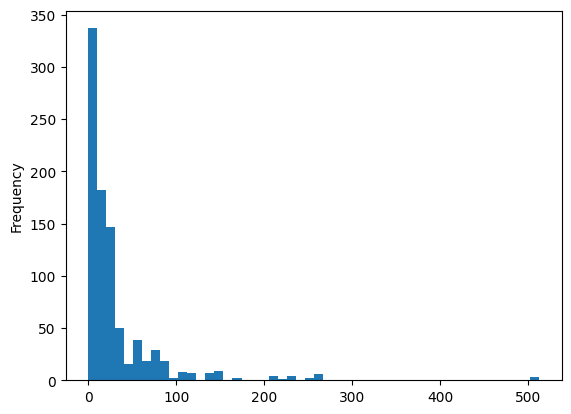

In [57]:
df['Fare'].plot.hist(bins=50)

<Axes: xlabel='Fare', ylabel='Count'>

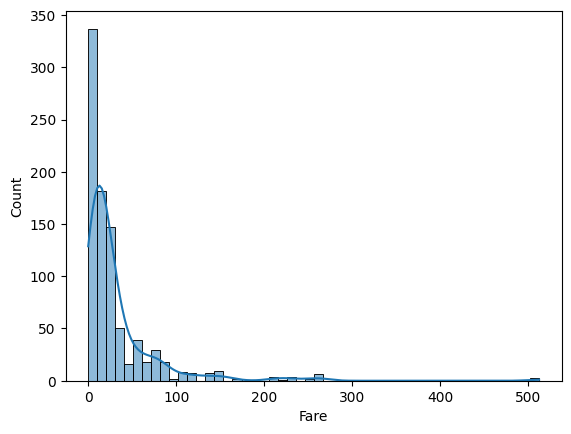

In [56]:
sns.histplot(df['Fare'], bins=50, kde=True)

In [65]:
Fare_bins=[-0.1,6,10,30,58,81,550]
Fare_labels=['Very Low','Low','Lower Middle','Middle','Upper Middle','High']
df['FareBin']=pd.cut(df['Fare'],bins=Fare_bins,labels=Fare_labels)

## 🔧 Feature Engineering Summary

The following new features were added to enhance the dataset for better exploration and modeling:

- **AgeBin**: Categorized passengers into life stages:
  - Children (0–18), Young Adults (18–30), Adults (30–60), Seniors (60+)
- **FareQuantile**: Divided fare into quartiles using `pd.qcut` to handle skew and ensure even distribution.
- **IsSingle**: Boolean feature indicating if the passenger was traveling alone (`SibSp == 0 and Parch == 0`).
- **FamilySize**: Total number of family members aboard, calculated as `SibSp + Parch + 1`.
- **FarePerPerson**: Adjusted fare per passenger by dividing Fare by FamilySize (`Fare / FamilySize`).

These features help better understand relationships between demographics, ticketing/family structures, and survival.


In [13]:
df.drop(['HusbandName','ActualName'],axis=1,inplace=True)

In [66]:
df.to_csv(r'..\data\final_cleaned.csv',index=False)